<a href="https://colab.research.google.com/github/gyeongdong13/Project/blob/main/O2b_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='NanumGothic')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (5,169 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129499 files and di

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv', encoding='utf-8')
df

col_name = ['고객번호', '잔액', '잔액 업데이트 빈도', '구매금액', '일시불 구매금액', "할부 구매금액", "현금 선지급", "구매빈도", "일회성 구매빈도", "할부 구매빈도", "현금 선지급 빈도", "현금 선지급 거래수", "구매건수", "카드 한도", "지불금액","지불한 최소금액", "지불한 전액 지불비율","카드 서비스 기간"]
df.columns = col_name

In [ ]:
df2 = df[["구매금액", "일시불 구매금액", "구매건수", "할부 구매금액", "지불금액"]]
df2

,구매금액,일시불 구매금액,구매건수,할부 구매금액,지불금액
0,95.40,0.00,2,95.40,201.802084
1,0.00,0.00,0,0.00,4103.032597
2,773.17,773.17,12,0.00,622.066742
3,1499.00,1499.00,1,0.00,0.000000
4,16.00,16.00,1,0.00,678.334763
...,...,...,...,...,...
8945,291.12,0.00,6,291.12,325.594462
8946,300.00,0.00,6,300.00,275.861322
8947,144.40,0.00,5,144.40,81.270775
8948,0.00,0.00,0,0.00,52.549959


In [ ]:
# 로그 변환
df2_copy = df2.copy()
_purchase = np.log1p(df2_copy["지불금액"])
df2_copy.insert(0,"정규화 지불금액", _purchase)

sale_purchase = np.log1p(df2_copy["할부 구매금액"])
df2_copy.insert(0,"정규화 할부 구매금액", sale_purchase)

count_purchase = np.log1p(df2_copy["구매건수"])
df2_copy.insert(0,"정규화 구매건수", count_purchase)

oneoff_purchase = np.log1p(df2_copy["일시불 구매금액"])
df2_copy.insert(0,"정규화 일시불 구매금액", oneoff_purchase)

purchase = np.log1p(df2_copy["구매금액"])
df2_copy.insert(0,"정규화 구매금액", purchase)

df2_copy.drop(["구매금액", "일시불 구매금액", "구매건수", "할부 구매금액", "지불금액"], axis=1, inplace=True)
df2_copy

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액
0,4.568506,0.000000,1.098612,4.568506,5.312231
1,0.000000,0.000000,0.000000,0.000000,8.319725
2,6.651791,6.651791,2.564949,0.000000,6.434654
3,7.313220,7.313220,0.693147,0.000000,0.000000
4,2.833213,2.833213,0.693147,0.000000,6.521114
...,...,...,...,...,...
8945,5.677165,0.000000,1.945910,5.677165,5.788719
8946,5.707110,0.000000,1.945910,5.707110,5.623517
8947,4.979489,0.000000,1.791759,4.979489,4.410016
8948,0.000000,0.000000,0.000000,0.000000,3.980615


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

gmm = GaussianMixture(n_components=4, covariance_type = "diag", random_state=0, n_init=10)
gmm.fit(df2_copy)
gmm_label = gmm.predict(df2_copy)
df2_copy['gmm_label'] = gmm_label
df2_copy

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액,gmm_label
0,4.568506,0.000000,1.098612,4.568506,5.312231,3
1,0.000000,0.000000,0.000000,0.000000,8.319725,0
2,6.651791,6.651791,2.564949,0.000000,6.434654,2
3,7.313220,7.313220,0.693147,0.000000,0.000000,2
4,2.833213,2.833213,0.693147,0.000000,6.521114,2
...,...,...,...,...,...,...
8945,5.677165,0.000000,1.945910,5.677165,5.788719,3
8946,5.707110,0.000000,1.945910,5.707110,5.623517,3
8947,4.979489,0.000000,1.791759,4.979489,4.410016,3
8948,0.000000,0.000000,0.000000,0.000000,3.980615,0


In [ ]:
df2_copy.groupby("gmm_label").count()

,정규화 구매금액,정규화 일시불 구매금액,정규화 구매건수,정규화 할부 구매금액,정규화 지불금액
gmm_label,,,,,
0,2040,2040,2040,2040,2040
1,2774,2774,2774,2774,2774
2,1876,1876,1876,1876,1876
3,2260,2260,2260,2260,2260


In [ ]:
from sklearn.decomposition import PCA
X = df2_copy.copy()

# 객체
pca = PCA(n_components = 2)

# 적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-1.52839965, -3.36780739],
       [-6.85600865,  0.60869813],
       [ 1.45179356,  4.51336076],
       ...,
       [-0.9703597 , -3.77283734],
       [-7.28963834,  0.31483015],
       [ 1.7904982 ,  4.5471223 ]])

In [ ]:
pca_df = pd.DataFrame(x_pca)
pca_df["gmm_label"] = df2_copy["gmm_label"]
pca_df["pca_x"] = x_pca[:,0]
pca_df["pca_y"] = x_pca[:,1]

pca_df.head()

,0,1,gmm_label,pca_x,pca_y
0,-1.528400,-3.367807,3,-1.528400,-3.367807
1,-6.856009,0.608698,0,-6.856009,0.608698
2,1.451794,4.513361,2,1.451794,4.513361
3,1.049838,4.683072,2,1.049838,4.683072
4,-3.432652,2.051078,2,-3.432652,2.051078


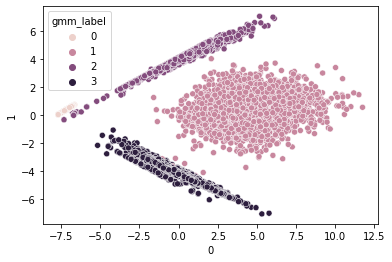

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0,1, hue = "gmm_label", data = pca_df)

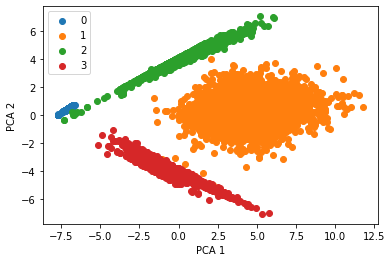

In [ ]:
for i in sorted(pca_df["gmm_label"].unique()) :
  tmp = pca_df.loc[pca_df["gmm_label"] == i]
  plt.scatter(tmp[0], tmp[1])
  plt.legend(sorted(pca_df["gmm_label"].unique()))
  plt.xlabel("PCA 1")
  plt.ylabel("PCA 2")

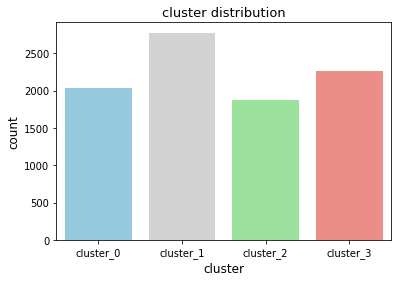

In [ ]:
y = [2040, 2774, 1876, 2260]
x = ["cluster_0", "cluster_1", "cluster_2", "cluster_3"]
sns.barplot(x=x,y=y, palette={"cluster_0":"skyblue", "cluster_1":"lightgray", "cluster_2":"lightgreen", "cluster_3":"#FC7F77" })
plt.xlabel("cluster",fontsize=12)
plt.ylabel("count", fontsize=12)
plt.title("cluster distribution", fontsize=13)
plt.show()

# 모델링

In [ ]:
df["clusters"] = gmm_label
df

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간,clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,3
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
df = df.fillna({"CREDIT_LIMIT":3000,"MINIMUM_PAYMENTS":312.34})
df

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간,clusters
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,3
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
df.to_csv("cluster_df1.csv")

In [ ]:
def resumetable(dd) :
  print(f'데이터셋 : {dd.shape}')
  summary = pd.DataFrame(dd.dtypes, columns=["데이터 타입"])
  summary = summary.reset_index()
  summary = summary.rename(columns={"index" : "피처"})
  summary["결측값 개수"] = dd.isnull().sum().values

  return summary

resumetable(df)

데이터셋 : (8950, 19)


,피처,데이터 타입,결측값 개수
0,고객번호,object,0
1,잔액,float64,0
2,잔액 업데이트 빈도,float64,0
3,구매금액,float64,0
4,일시불 구매금액,float64,0
5,할부 구매금액,float64,0
6,현금 선지급,float64,0
7,구매빈도,float64,0
8,일회성 구매빈도,float64,0
9,할부 구매빈도,float64,0


In [ ]:
df_cluster0 = df.loc[df["clusters"]==0]
df_cluster0

,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간,clusters
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.0,0.0,0.0,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
14,C10015,2772.772734,1.000000,0.0,0.0,0.0,346.811390,0.0,0.0,0.0,0.083333,1,0,3000.0,805.647974,989.962866,0.000000,12,0
16,C10017,2072.074354,0.875000,0.0,0.0,0.0,2784.274703,0.0,0.0,0.0,0.250000,3,0,3000.0,391.974562,376.579631,0.000000,8,0
24,C10025,5368.571219,1.000000,0.0,0.0,0.0,798.949863,0.0,0.0,0.0,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,0
35,C10036,1656.350781,1.000000,0.0,0.0,0.0,99.264367,0.0,0.0,0.0,0.083333,1,0,1800.0,351.500199,634.569311,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,C19161,1055.087681,0.666667,0.0,0.0,0.0,1820.116200,0.0,0.0,0.0,0.333333,2,0,2000.0,54.795084,233.229870,0.000000,6,0
8929,C19170,371.527312,0.333333,0.0,0.0,0.0,1465.407927,0.0,0.0,0.0,0.166667,5,0,1500.0,0.000000,NaN,0.000000,6,0
8937,C19178,163.001629,0.666667,0.0,0.0,0.0,274.440466,0.0,0.0,0.0,0.166667,3,0,1000.0,117.738787,60.792450,0.000000,6,0
8938,C19179,78.818407,0.500000,0.0,0.0,0.0,1113.186078,0.0,0.0,0.0,0.166667,7,0,1200.0,1397.770131,21.821194,0.333333,6,0


In [ ]:
# 0번 클러스터는 구매금액이 아예 0이므로 예측 X
df_cluster0.groupby("clusters")["구매금액"].mean()

clusters
0    0.0
Name: 구매금액, dtype: float64

In [ ]:
corr = df_cluster0.corr()["현금 선지급"].sort_values(ascending = False)
corr

현금 선지급         1.000000
지불금액           0.616290
카드 한도          0.557859
현금 선지급 거래수     0.507922
잔액             0.476102
현금 선지급 빈도      0.426228
지불한 최소금액       0.097102
지불한 전액 지불비율    0.068470
잔액 업데이트 빈도     0.036723
구매빈도          -0.017835
할부 구매빈도       -0.017835
카드 서비스 기간     -0.049564
구매금액                NaN
일시불 구매금액            NaN
할부 구매금액             NaN
일회성 구매빈도            NaN
구매건수                NaN
clusters            NaN
Name: 현금 선지급, dtype: float64

In [ ]:
df_cluster1 = df.loc[df["clusters"]==1]
df_cluster1 = df_cluster1.reset_index()
df_cluster1

,index,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간,clusters
0,6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
1,8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
2,12,C10013,1516.928620,1.000000,3217.99,2500.23,717.76,0.000000,1.000000,0.250000,0.916667,0.000000,0,26,3000.0,608.263689,490.207013,0.250000,12,1
3,13,C10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,1
4,18,C10019,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,13000.0,1720.837373,744.613395,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2769,8903,C19144,466.723482,0.833333,947.21,498.01,449.20,0.000000,0.833333,0.333333,0.666667,0.000000,0,27,1500.0,38.775803,131.313627,0.000000,6,1
2770,8912,C19153,376.547421,0.857143,520.00,280.00,240.00,1178.402416,0.857143,0.142857,0.714286,0.714286,9,7,1000.0,929.415656,103.927887,0.200000,7,1
2771,8923,C19164,486.661842,0.833333,1898.88,939.09,959.79,0.000000,0.833333,0.666667,0.666667,0.000000,0,24,1200.0,669.039640,336.880119,0.500000,6,1
2772,8927,C19168,91.639086,1.000000,315.20,147.80,167.40,0.000000,1.000000,0.333333,0.833333,0.000000,0,8,1000.0,231.274641,86.344733,0.250000,6,1


In [ ]:
df_cluster1.groupby("clusters")["구매금액"].mean()

clusters
1    2267.805908
Name: 구매금액, dtype: float32

In [ ]:
df_cluster2 = df.loc[df["clusters"]==2]
df_cluster2 = df_cluster2.reset_index()
df_cluster2

,index,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간,clusters
0,2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.0,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,2
1,3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.0,0.083333,1,1,7500.0,0.000000,NaN,0.0,12,2
2,4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.0,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,2
3,9,C10010,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.0,0.000000,0,3,11000.0,1164.770591,100.302262,0.0,12,2
4,11,C10012,630.794744,0.818182,1492.18,1492.18,0.0,0.000000,0.250000,0.250000,0.0,0.000000,0,6,2000.0,705.618627,155.549069,0.0,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,8924,C19165,7.336804,0.333333,74.00,74.00,0.0,0.000000,0.166667,0.166667,0.0,0.000000,0,1,3000.0,214.921009,44.254787,0.0,6,2
1872,8939,C19180,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.0,0.166667,2,2,1000.0,72.530037,110.950798,0.0,6,2
1873,8943,C19184,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.0,0.000000,0,1,500.0,58.644883,43.473717,0.0,6,2
1874,8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.0,0.000000,0,2,4000.0,0.000000,NaN,0.0,6,2


In [ ]:
df_cluster2.groupby("clusters")["구매금액"].mean()

clusters
2    785.920288
Name: 구매금액, dtype: float32

In [ ]:
df_cluster3 = df.loc[df["clusters"]==3]
df_cluster3 = df_cluster3.reset_index()
df_cluster3

,index,고객번호,잔액,잔액 업데이트 빈도,구매금액,일시불 구매금액,할부 구매금액,현금 선지급,구매빈도,일회성 구매빈도,할부 구매빈도,현금 선지급 빈도,현금 선지급 거래수,구매건수,카드 한도,지불금액,지불한 최소금액,지불한 전액 지불비율,카드 서비스 기간,clusters
0,0,C10001,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.0,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,3
1,5,C10006,1809.828751,1.000000,1333.28,0.0,1333.28,0.000000,0.666667,0.0,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,3
2,7,C10008,1823.652743,1.000000,436.20,0.0,436.20,0.000000,1.000000,0.0,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12,3
3,10,C10011,1293.124939,1.000000,920.12,0.0,920.12,0.000000,1.000000,0.0,1.000000,0.000000,0,12,1200.0,1083.301007,2172.697765,0.00,12,3
4,15,C10016,6886.213231,1.000000,1611.70,0.0,1611.70,2301.491267,0.500000,0.0,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.00,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,8941,C19182,5967.475270,0.833333,214.55,0.0,214.55,8555.409326,0.833333,0.0,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,3
2256,8942,C19183,40.829749,1.000000,113.28,0.0,113.28,0.000000,1.000000,0.0,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,3
2257,8945,C19186,28.493517,1.000000,291.12,0.0,291.12,0.000000,1.000000,0.0,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,3
2258,8946,C19187,19.183215,1.000000,300.00,0.0,300.00,0.000000,1.000000,0.0,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6,3


In [ ]:
df_cluster3.groupby("clusters")["구매금액"].mean()

clusters
3    536.904236
Name: 구매금액, dtype: float32

In [ ]:
# 데이터 다운캐스팅 사용함으로써 메모리 사용량 축소
def downcast(df, verbose=True) :
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns :
    dtype_name = df[col].dtype.name
    if dtype_name == "object" :
      pass
    elif dtype_name == "bool" :
      df[col] = df[col].astype("int8")
    elif dtype_name.startswith("int") or (df[col].round() == df[col]).all() :
      df[col] = pd.to_numeric(df[col], downcast = "integer")
    else :
      df[col] = pd.to_numeric(df[col], downcast = "float")
  end_mem = df.memory_usage().sum() / 1024**2
  if verbose :
    print("{:.1f}% 압축됨".format(100*(start_mem - end_mem) / start_mem))

  return df

In [ ]:
all_df = [df_cluster0, df_cluster1, df_cluster2, df_cluster3]
for df in all_df :
  df = downcast(df)

60.0% 압축됨
55.6% 압축됨
59.3% 압축됨
59.4% 압축됨


# 1번 클러스터 예측

In [ ]:
data1 = df_cluster1.drop(["구매금액", "고객번호", "clusters"], axis=1)
target1 = df_cluster1.loc[:,['구매금액']]

data1_scaled = np.log1p(data1)
target1_scaled = np.log1p(target1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data1_scaled, target1_scaled, test_size=0.2, shuffle = False)

In [ ]:
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (2219, 17) y_train: (2219, 1)
x_test: (555, 17) y_test: (555, 1)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor


pipe = Pipeline([('regressor', RandomForestRegressor())])
search_space = [
                {
                 'regressor': [RandomForestRegressor(random_state=0)],
                 'regressor__n_estimators': [100, 150, 200],
                 'regressor__max_depth': [3, 4, 5]
                },

                {
                 'regressor': [XGBRegressor()],
                 'regressor__max_depth': [3],
                 'regressor__n_estimators': [300],
                 'regressor__eta': [0.02, 0.1],
                 'regressor__subsample': [0.5, 0.6],
                 'regressor__seed':[0]
                },

                {
                 'regressor': [DecisionTreeRegressor(random_state=0)],
                 'regressor__min_samples_split':[3, 4, 5],
                 'regressor__max_depth': [3, 4, 5]
                }
               ]

In [ ]:
kf = KFold(n_splits=5,random_state=None)
grid_search = GridSearchCV(pipe,search_space, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train.values.ravel())

print('best params:', grid_search.best_params_)
print('best estimator:', grid_search.best_estimator_)
print('best rmse :', np.sqrt(-(grid_search.best_score_)))

[14:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best params: {'regressor': XGBRegressor(eta=0.02, n_estimators=300, seed=0, subsample=0.6), 'regressor__eta': 0.02, 'regressor__max_depth': 3, 'regressor__n_estimators': 300, 'regressor__seed': 0, 'regressor__subsample': 0.6}
best estimator: Pipeline(steps=[('regressor',
                 XGBRegressor(eta=0.02, n_estimators=300, seed=0,
                              subsample=0.6))])
best rmse : 0.05333651385604259


In [ ]:
predictions = grid_search.predict(x_test)
predictions = pd.DataFrame(predictions)

col_name = ['구매금액']
predictions.columns = col_name
predictions

,구매금액
0,7.865331
1,9.000092
2,6.638406
3,7.240804
4,5.482662
...,...
550,6.864162
551,6.299104
552,7.568800
553,5.809627


In [ ]:
y_test1 = y_test.reset_index()
y_test1 = y_test1.drop(["index"], axis=1)
y_test1

,구매금액
0,7.863344
1,9.063231
2,6.662405
3,7.221836
4,5.516649
...,...
550,6.854576
551,6.255750
552,7.549546
553,5.756375


In [ ]:
rmse = np.sqrt(np.mean(predictions.sub(y_test1)**2))
rmse

구매금액    0.055013
dtype: float32

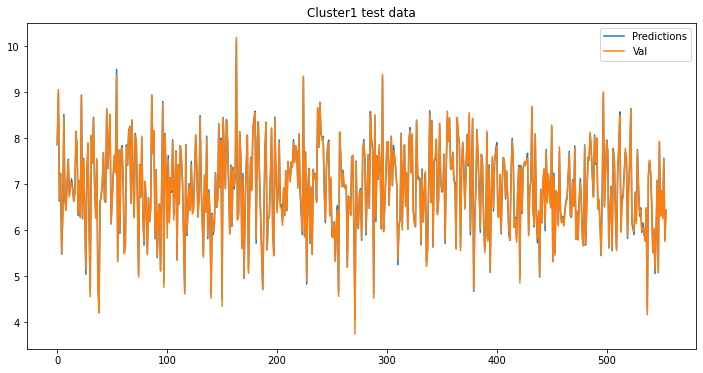

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Cluster1 test data')
plt.plot(predictions)
plt.plot(y_test1)
plt.legend(['Predictions', 'Val'])

In [ ]:
predict1 = grid_search.predict(data1_scaled)
predict1

array([8.861079 , 6.7517176, 8.091351 , ..., 7.5688004, 5.809627 ,
       6.437548 ], dtype=float32)

In [ ]:
tmp_pred = pd.DataFrame(predict1)
col_name = ['구매금액']
tmp_pred.columns = col_name
tmp_pred

,구매금액
0,8.861079
1,6.751718
2,8.091351
3,7.717012
4,6.225043
...,...
2769,6.864162
2770,6.299104
2771,7.568800
2772,5.809627


In [ ]:
tmp_pred = pd.concat([df_cluster1["고객번호"],tmp_pred], axis=1)
tmp_pred

,고객번호,구매금액
0,C10007,8.861079
1,C10009,6.751718
2,C10013,8.091351
3,C10014,7.717012
4,C10019,6.225043
...,...,...
2769,C19144,6.864162
2770,C19153,6.299104
2771,C19164,7.568800
2772,C19168,5.809627


[14:38:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


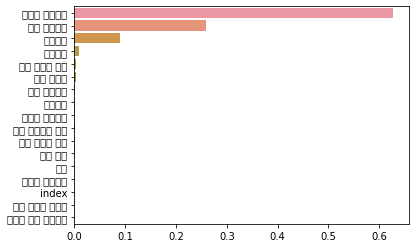

In [ ]:
import seaborn as sns
%matplotlib inline

xgb_reg = XGBRegressor(max_depth=3,
                 n_estimators=300,
                 eta=0.02,
                 subsample=0.6,
                 seed=0)

xgb_reg.fit(x_train, y_train)

feature_series = pd.Series(data = xgb_reg.feature_importances_, index=x_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

# 2번 클러스터 예측

In [ ]:
data2 = df_cluster2.drop(["구매금액", "고객번호", "clusters"], axis=1)
target2 = df_cluster2.loc[:,['구매금액']]

data2_scaled = np.log1p(data2)
target2_scaled = np.log1p(target2)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data2_scaled, target2_scaled, test_size=0.2, shuffle = False)

In [ ]:
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (1500, 17) y_train: (1500, 1)
x_test: (376, 17) y_test: (376, 1)


In [ ]:
pipe = Pipeline([('regressor', RandomForestRegressor())])
search_space = [
                {
                 'regressor': [RandomForestRegressor(random_state=0)],
                 'regressor__n_estimators': [100, 150, 200],
                 'regressor__max_depth': [3, 4, 5]
                },

                {
                 'regressor': [XGBRegressor()],
                 'regressor__max_depth': [3],
                 'regressor__n_estimators': [300],
                 'regressor__eta': [0.02, 0.1],
                 'regressor__subsample': [0.5, 0.6],
                 'regressor__seed':[0]
                },

                {
                 'regressor': [DecisionTreeRegressor(random_state=0)],
                 'regressor__min_samples_split':[3, 4, 5],
                 'regressor__max_depth': [3, 4, 5]
                }
               ]

In [ ]:
kf = KFold(n_splits=5,random_state=None)
grid_search = GridSearchCV(pipe,search_space, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train.values.ravel())

print('best params:', grid_search.best_params_)
print('best estimator:', grid_search.best_estimator_)
print('best rmse :', np.sqrt(-(grid_search.best_score_)))

[14:39:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best params: {'regressor': XGBRegressor(eta=0.02, n_estimators=300, seed=0, subsample=0.6), 'regressor__eta': 0.02, 'regressor__max_depth': 3, 'regressor__n_estimators': 300, 'regressor__seed': 0, 'regressor__subsample': 0.6}
best estimator: Pipeline(steps=[('regressor',
                 XGBRegressor(eta=0.02, n_estimators=300, seed=0,
                              subsample=0.6))])
best rmse : 0.02959357386076411


In [ ]:
predictions = grid_search.predict(x_test)
predictions = pd.DataFrame(predictions)

col_name = ['구매금액']
predictions.columns = col_name
predictions

,구매금액
0,7.168889
1,6.055083
2,5.443873
3,5.131922
4,4.364733
...,...
371,4.320903
372,6.616846
373,3.070210
374,6.923600


In [ ]:
y_test1 = y_test.reset_index()
y_test1 = y_test1.drop(["index"], axis=1)
y_test1

,구매금액
0,7.180831
1,6.069074
2,5.438079
3,5.156811
4,4.391977
...,...
371,4.317488
372,6.600415
373,3.086487
374,6.921392


In [ ]:
rmse = np.sqrt(np.mean(predictions.sub(y_test1)**2))
rmse

구매금액    0.021773
dtype: float32

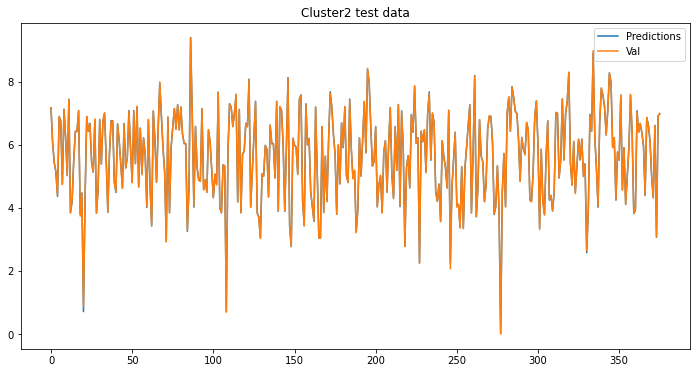

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Cluster2 test data')
plt.plot(predictions)
plt.plot(y_test1)
plt.legend(['Predictions', 'Val'])

In [ ]:
predict2 = grid_search.predict(data2_scaled)
predict2

array([6.67175  , 7.315149 , 2.8292925, ..., 3.07021  , 6.9235997,
       6.9852686], dtype=float32)

In [ ]:
tmp_pred = pd.DataFrame(predict2)
col_name = ['구매금액']
tmp_pred.columns = col_name
tmp_pred

,구매금액
0,6.671750
1,7.315149
2,2.829293
3,7.155502
4,7.310156
...,...
1871,4.320903
1872,6.616846
1873,3.070210
1874,6.923600


In [ ]:
tmp_pred = pd.concat([df_cluster2["고객번호"],tmp_pred], axis=1)
tmp_pred

,고객번호,구매금액
0,C10003,6.671750
1,C10004,7.315149
2,C10005,2.829293
3,C10010,7.155502
4,C10012,7.310156
...,...,...
1871,C19165,4.320903
1872,C19180,6.616846
1873,C19184,3.070210
1874,C19185,6.923600


[14:39:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


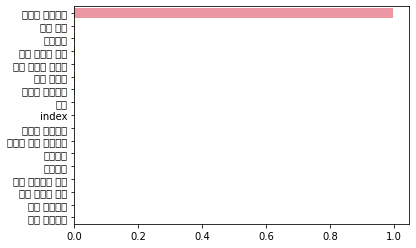

In [ ]:
import seaborn as sns
%matplotlib inline

xgb_reg = XGBRegressor(max_depth=3,
                 n_estimators=300,
                 eta=0.02,
                 subsample=0.6,
                 seed=0)

xgb_reg.fit(x_train, y_train)

feature_series = pd.Series(data = xgb_reg.feature_importances_, index=x_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

# 3번 클러스터 예측

In [ ]:
data3 = df_cluster3.drop(["구매금액", "고객번호", "clusters"], axis=1)
target3 = df_cluster3.loc[:,['구매금액']]

data3_scaled = np.log1p(data3)
target3_scaled = np.log1p(target3)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data3_scaled, target3_scaled, test_size=0.2, shuffle = False)

In [ ]:
x_train_shape = np.shape(x_train)
y_train_shape = np.shape(y_train)
x_test_shape = np.shape(x_test)
y_test_shape = np.shape(y_test)

print('x_train:',x_train_shape, 'y_train:',y_train_shape)
print('x_test:',x_test_shape, 'y_test:',y_test_shape)

x_train: (1808, 17) y_train: (1808, 1)
x_test: (452, 17) y_test: (452, 1)


In [ ]:
pipe = Pipeline([('regressor', RandomForestRegressor())])
search_space = [
                {
                 'regressor': [RandomForestRegressor(random_state=0)],
                 'regressor__n_estimators': [100, 150, 200],
                 'regressor__max_depth': [3, 4, 5]
                },

                {
                 'regressor': [XGBRegressor()],
                 'regressor__max_depth': [3],
                 'regressor__n_estimators': [300],
                 'regressor__eta': [0.02, 0.1],
                 'regressor__subsample': [0.5, 0.6],
                 'regressor__seed':[0]
                },

                {
                 'regressor': [DecisionTreeRegressor(random_state=0)],
                 'regressor__min_samples_split':[3, 4, 5],
                 'regressor__max_depth': [3, 4, 5]
                }
               ]

In [ ]:
kf = KFold(n_splits=5,random_state=None)
grid_search = GridSearchCV(pipe,search_space, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train.values.ravel())

print('best params:', grid_search.best_params_)
print('best estimator:', grid_search.best_estimator_)
print('best rmse :', np.sqrt(-(grid_search.best_score_)))

[14:39:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
best params: {'regressor': XGBRegressor(eta=0.02, n_estimators=300, seed=0, subsample=0.5), 'regressor__eta': 0.02, 'regressor__max_depth': 3, 'regressor__n_estimators': 300, 'regressor__seed': 0, 'regressor__subsample': 0.5}
best estimator: Pipeline(steps=[('regressor',
                 XGBRegressor(eta=0.02, n_estimators=300, seed=0,
                              subsample=0.5))])
best rmse : 0.0826937140687356


In [ ]:
predictions = grid_search.predict(x_test)
predictions = pd.DataFrame(predictions)

col_name = ['구매금액']
predictions.columns = col_name
predictions

,구매금액
0,3.966533
1,6.071101
2,6.023427
3,5.444871
4,6.133138
...,...
447,5.320192
448,4.683002
449,5.669360
450,5.710875


In [ ]:
y_test1 = y_test.reset_index()
y_test1 = y_test1.drop(["index"], axis=1)
y_test1

,구매금액
0,3.965184
1,6.069629
2,5.999259
3,5.474370
4,6.143413
...,...
447,5.373193
448,4.738652
449,5.677165
450,5.707110


In [ ]:
rmse = np.sqrt(np.mean(predictions.sub(y_test1)**2))
rmse

구매금액    0.02734
dtype: float32

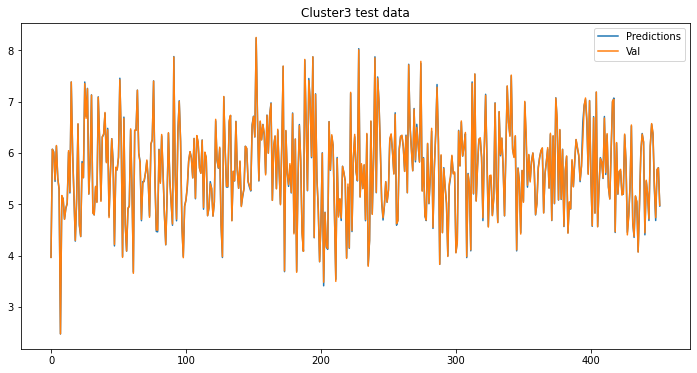

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Cluster3 test data')
plt.plot(predictions)
plt.plot(y_test1)
plt.legend(['Predictions', 'Val'])

In [ ]:
predict3 = grid_search.predict(data3_scaled)
predict3

array([4.57328  , 7.2214885, 6.089611 , ..., 5.66936  , 5.7108746,
       4.965523 ], dtype=float32)

In [ ]:
predict3 = np.expm1(predict3)

In [ ]:
np.mean(predict3)

536.30054

In [ ]:
tmp_pred = pd.DataFrame(predict3)
col_name = ['구매금액']
tmp_pred.columns = col_name
tmp_pred

,구매금액
0,95.861282
1,1367.524536
2,440.249756
3,918.474670
4,1603.579712
...,...
2255,203.423187
2256,107.094131
2257,288.849030
2258,301.135193


In [ ]:
tmp_pred = pd.concat([df_cluster3["고객번호"],tmp_pred], axis=1)
tmp_pred

,고객번호,구매금액
0,C10001,95.861282
1,C10006,1367.524536
2,C10008,440.249756
3,C10011,918.474670
4,C10016,1603.579712
...,...,...
2255,C19182,203.423187
2256,C19183,107.094131
2257,C19186,288.849030
2258,C19187,301.135193


[14:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


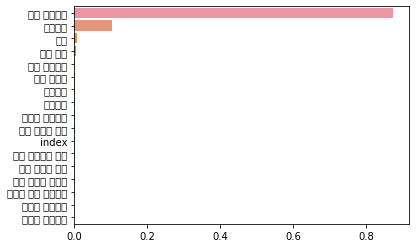

In [ ]:
import seaborn as sns
%matplotlib inline

xgb_reg = XGBRegressor(max_depth=3,
                 n_estimators=300,
                 eta=0.02,
                 subsample=0.5,
                 seed=0)

xgb_reg.fit(x_train, y_train)

feature_series = pd.Series(data = xgb_reg.feature_importances_, index=x_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [ ]:
corr = data3.corr()["할부 구매금액"].sort_values(ascending = False)
corr

할부 구매금액        1.000000
구매건수           0.476985
지불금액           0.355578
할부 구매빈도        0.254944
구매빈도           0.248953
카드 한도          0.248459
지불한 최소금액       0.207506
잔액             0.192881
잔액 업데이트 빈도     0.142608
지불한 전액 지불비율    0.078492
카드 서비스 기간      0.066814
현금 선지급         0.005417
현금 선지급 거래수    -0.021309
현금 선지급 빈도     -0.028659
index         -0.069799
일시불 구매금액            NaN
일회성 구매빈도            NaN
Name: 할부 구매금액, dtype: float64